# Recommendation Engines

## First of all we will going to import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### We will going to take two dataset first one is movie dataset in which we will have movie names and the second dataset will have ratings and userID

In [2]:
#read_csv files
movie_titles = pd.read_csv('movie.csv')

In [3]:
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_titles.drop('genres',axis=1)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
27273,131254,Kein Bund für's Leben (2007)
27274,131256,"Feuer, Eis & Dosenbier (2002)"
27275,131258,The Pirates (2014)
27276,131260,Rentun Ruusu (2001)


In [5]:
#read_csv files
df = pd.read_csv('rating.csv')

In [6]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [7]:
df.drop('timestamp',axis=1,inplace=True)

In [8]:
## Lets merge df and movie_titles dataframe

df = pd.merge(df,movie_titles,on='movieId')
df.head()

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy


**As noted here one user has rated one or more than one movie. This means that one movie has been rated by more than one user.**

In [9]:
df.shape

(20000263, 5)

### As we see the dataset is quite big, we are going to subset our dataset and take 10M rows

In [10]:
df = df.iloc[:10000000]

## Data Visualization

In [11]:
## Lets explore the data a bit and get a look at some of the best rated movie

### Let's find the average rating of each movie

In [12]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    4.446990
Godfather, The (1972)               4.364732
Usual Suspects, The (1995)          4.334372
Schindler's List (1993)             4.310175
Godfather: Part II, The (1974)      4.275641
Name: rating, dtype: float64

### Let's find the number of rating a particular movie has received

In [13]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

### Now we will going to make a datafame in which we will have rating and number of ratings column

In [14]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
*batteries not included (1987),3.245087
10 Things I Hate About You (1999),3.473909
"10,000 BC (2008)",2.513688
100 Girls (2000),3.046961
101 Dalmatians (1996),3.078429


In [15]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
*batteries not included (1987),3.245087,1730
10 Things I Hate About You (1999),3.473909,11613
"10,000 BC (2008)",2.513688,1863
100 Girls (2000),3.046961,362
101 Dalmatians (1996),3.078429,8581


<function matplotlib.pyplot.show(close=None, block=None)>

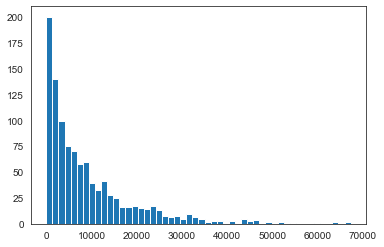

In [16]:
plt.hist(ratings['num of ratings'],bins=50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

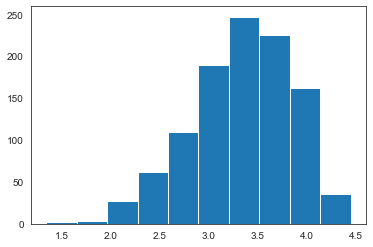

In [17]:
plt.hist(ratings['rating'])
plt.show

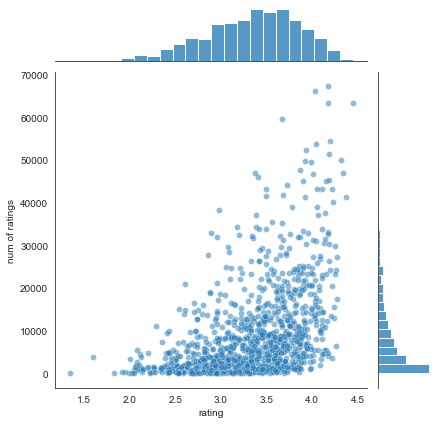

In [18]:
sns.jointplot(x='rating',y='num of ratings', data=ratings,alpha=0.5)

## Recommender System

In [19]:
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
moviemat = df.pivot_table(index='userId',values='rating',columns='title')
moviemat.head()

title,*batteries not included (1987),10 Things I Hate About You (1999),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),102 Dalmatians (2000),13 Ghosts (1960),13 Going on 30 (2004),1408 (2007),16 Blocks (2006),...,X-Men (2000),X-Men Origins: Wolverine (2009),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yellow Submarine (1968),Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),eXistenZ (1999),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,3.0,NaN,4.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now we will make a function which will recommend the movie with their correlation score.Note that higher the correlation more the movie related to each other.

In [20]:
# most rated movies

ratings.sort_values('num of ratings').head(20)

,rating,num of ratings
title,,
Dark Ride (2006),2.583333,6
Hero Wanted (2008),2.695652,23
August (2008),3.062500,24
Sex and Breakfast (2007),2.660714,28
War of the Worlds 2: The Next Wave (2008),1.339286,28
After Sex (2007),2.784091,44
Wilder Napalm (1993),2.684783,46
My Mom's New Boyfriend (2008),2.923729,59
"Welcome Home, Roscoe Jenkins (2008)",2.525000,60


In [21]:
def recommend_movie(movie):
    movie_watched = moviemat[movie]
    similarity_with_other_movies = moviemat.corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

In [22]:
recommend_movie('Jumanji (1995)')

title
Jumanji (1995)                               1.000000
Dark Ride (2006)                             0.807773
Mac and Me (1988)                            0.582833
War of the Worlds 2: The Next Wave (2008)    0.505680
Casper (1995)                                0.496648
dtype: float64

In [23]:
recommend_movie('Die Hard (1988)')

title
Die Hard (1988)                      1.000000
Die Hard 2 (1990)                    0.579975
Die Hard: With a Vengeance (1995)    0.545714
Terminator, The (1984)               0.448158
Terminator 2: Judgment Day (1991)    0.431830
dtype: float64